In [1]:
#reference https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [2]:
import pandas as pd
import glob
import json
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os
#print(os.listdir("../input"))
import spacy
import random 
from collections import Counter #for counting
import seaborn as sns #for visualization
#load spacy
import spacy
import numpy as np
from spacy.lang.en import English #this tells the library to load the english character maps

In [3]:

files = glob.glob('data/tweet_ladies_7500/*')
#files = glob.glob('user/*')
len(files)

12161

In [4]:
dictlist = []

for file in files:
    json_string = open(file, 'r').read()
    json_dict = json.loads(json_string)
    dictlist.append(json_dict)

In [5]:

df = pd.DataFrame(dictlist)

df = df.replace({'\n': ' '}, regex=True) # remove linebreaks in the dataframe
df = df.replace({'\t': ' '}, regex=True) # remove tabs in the dataframe
df = df.replace({'\r': ' '}, regex=True) # remove carriage return in the dataframe
df.rename(columns={'text':'tweet'}, inplace=True)

In [6]:
df.head()


,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet
0,1134995662477484032,2019-06-01 21:30:27,NaN,False,False,NaN,0,0,0,# Nwsl Result Orlando 0 North Carolina 3,/karlyboy71/status/1134995662477484032,562470608,karlyboy71
1,1134995681326850048,2019-06-01 21:30:32,NaN,False,False,NaN,0,1,0,# ORLvNC #NWSL Tô achando que o meu crush ...,/BRAwnt17/status/1134995681326850048,828691991189917697,BRAwnt17
2,1134995711395868678,2019-06-01 21:30:39,NaN,False,False,NaN,2,0,2,FT: @ORLPride 0-3 @TheNCCourage Three goal...,/RachaelMcKriger/status/1134995711395868678,1566948030,RachaelMcKriger
3,1134995753275928576,2019-06-01 21:30:49,NaN,False,False,NaN,16,0,4,FINAL: @TheNCCourage snap their 4-match winle...,/ByNeilMorris/status/1134995753275928576,104374848,ByNeilMorris
4,1134995807814520832,2019-06-01 21:31:02,NaN,False,False,NaN,145,2,18,Kristen Hamilton. Her name is Kristen Hamilton...,/NWSL/status/1134995807814520832,1013399942,NWSL


In [7]:
import re
import gensim

#tokenize the sentences 
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.tweet.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['nwsl', 'result', 'orlando', 'north', 'carolina']]


In [8]:
#build some of the gensim models

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [9]:
#define the stop words and import the modules we need

import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could',\
                   '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank',\
                   'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even',\
              'right', 'line', 'even', 'also', 'may', 'take', 'come', 'http', 'https', 'uswnt','twitt','twitter','tweet','pic',\
                  'nwsl','usmnt','cannmt','canwnt','trump','www','league','com','status','ball', 'bit_ly','que','var','link'])

In [10]:
#initial processing of data through the models


# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


In [11]:
#create the dictionary 

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=15,
                                           alpha='symmetric',
                                           iterations=50,
                                           per_word_topics=True)

pprint(lda_model.print_topics())


[(0,
  '0.063*"vote" + 0.030*"man" + 0.013*"year" + 0.012*"fan" + 0.012*"new" + '
  '0.010*"look" + 0.010*"let" + 0.010*"last" + 0.009*"penalty" + 0.009*"male"'),
 (1,
  '0.048*"week" + 0.038*"save" + 0.027*"barnhartsow" + 0.014*"fifaworldcup" + '
  '0.012*"goal" + 0.008*"kopmeyersow" + 0.008*"final" + 0.007*"hit" + '
  '0.007*"qatar" + 0.007*"mais"'),
 (2,
  '0.057*"pay" + 0.053*"equal" + 0.029*"woman" + 0.025*"team" + 0.014*"sport" '
  '+ 0.012*"player" + 0.011*"play" + 0.011*"soccer" + 0.010*"game" + '
  '0.009*"equalpay"'),
 (3,
  '0.104*"cup" + 0.103*"world" + 0.100*"fifa" + 0.056*"women" + 0.028*"woman" '
  '+ 0.026*"japan" + 0.023*"netherland" + 0.022*"watch" + 0.015*"italy" + '
  '0.013*"china"')]


In [12]:
#define the dominant topic in each of the tweets

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4968,"vote, man, year, fan, new, look, let, last, pe...","[result, orlando, north_carolina]"
1,1,1.0,0.9078,"week, save, barnhartsow, fifaworldcup, goal, k...","[orlvnc, achando, pode, rodar, ainda, esse, an..."
2,2,1.0,0.3933,"week, save, barnhartsow, fifaworldcup, goal, k...","[goal, notch, point, road, north_carolina, vic..."
3,3,3.0,0.3498,"cup, world, fifa, women, woman, japan, netherl...","[final, snap, match, winless, stretch, win, ea..."
4,4,2.0,0.5802,"pay, equal, woman, team, sport, player, play, ...","[name, orlvnc, dmziowlocj]"
5,5,2.0,0.5709,"pay, equal, woman, team, sport, player, play, ...","[pride, courage, courage, well, place, team, s..."
6,6,1.0,0.5807,"week, save, barnhartsow, fifaworldcup, goal, k...","[loud, back, kristenhamilton, hattrickhammy]"
7,7,3.0,0.5063,"cup, world, fifa, women, woman, japan, netherl...","[love, ham, reference]"
8,8,0.0,0.5885,"vote, man, year, fan, new, look, let, last, pe...","[orlando_pride, hamilton, hat, track, power, c..."
9,9,1.0,0.4847,"week, save, barnhartsow, fifaworldcup, goal, k...","[debut, wonder, earn, start, week, bite, antic..."


In [13]:
#define the most representative sample for each topic
#this is basically the tweet that best models the keyword combo

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9591,"vote, man, year, fan, new, look, let, last, penalty, male","[trade, alert, sky_blue_fc, acquire, midfielder, elizabeth_eddy, exchange, mckenzie_meehan, sbfc..."
1,1.0,0.9785,"week, save, barnhartsow, fifaworldcup, goal, kopmeyersow, final, hit, qatar, mais","[setiausaha, agung, datuk, windsor, paul, mengingatkan, negara, negara, asia, tenggara, agar, me..."
2,2.0,0.9688,"pay, equal, woman, team, sport, player, play, soccer, game, equalpay","[congrat, alabama, pass, state, first, pay, equity, law, wohgk, thrilled, progress, equalpay, tr..."
3,3.0,0.9771,"cup, world, fifa, women, woman, japan, netherland, watch, italy, china","[netherland, woman, japan, woman, fifa, women, world, cup, live_stream, netherland, woman, japan..."


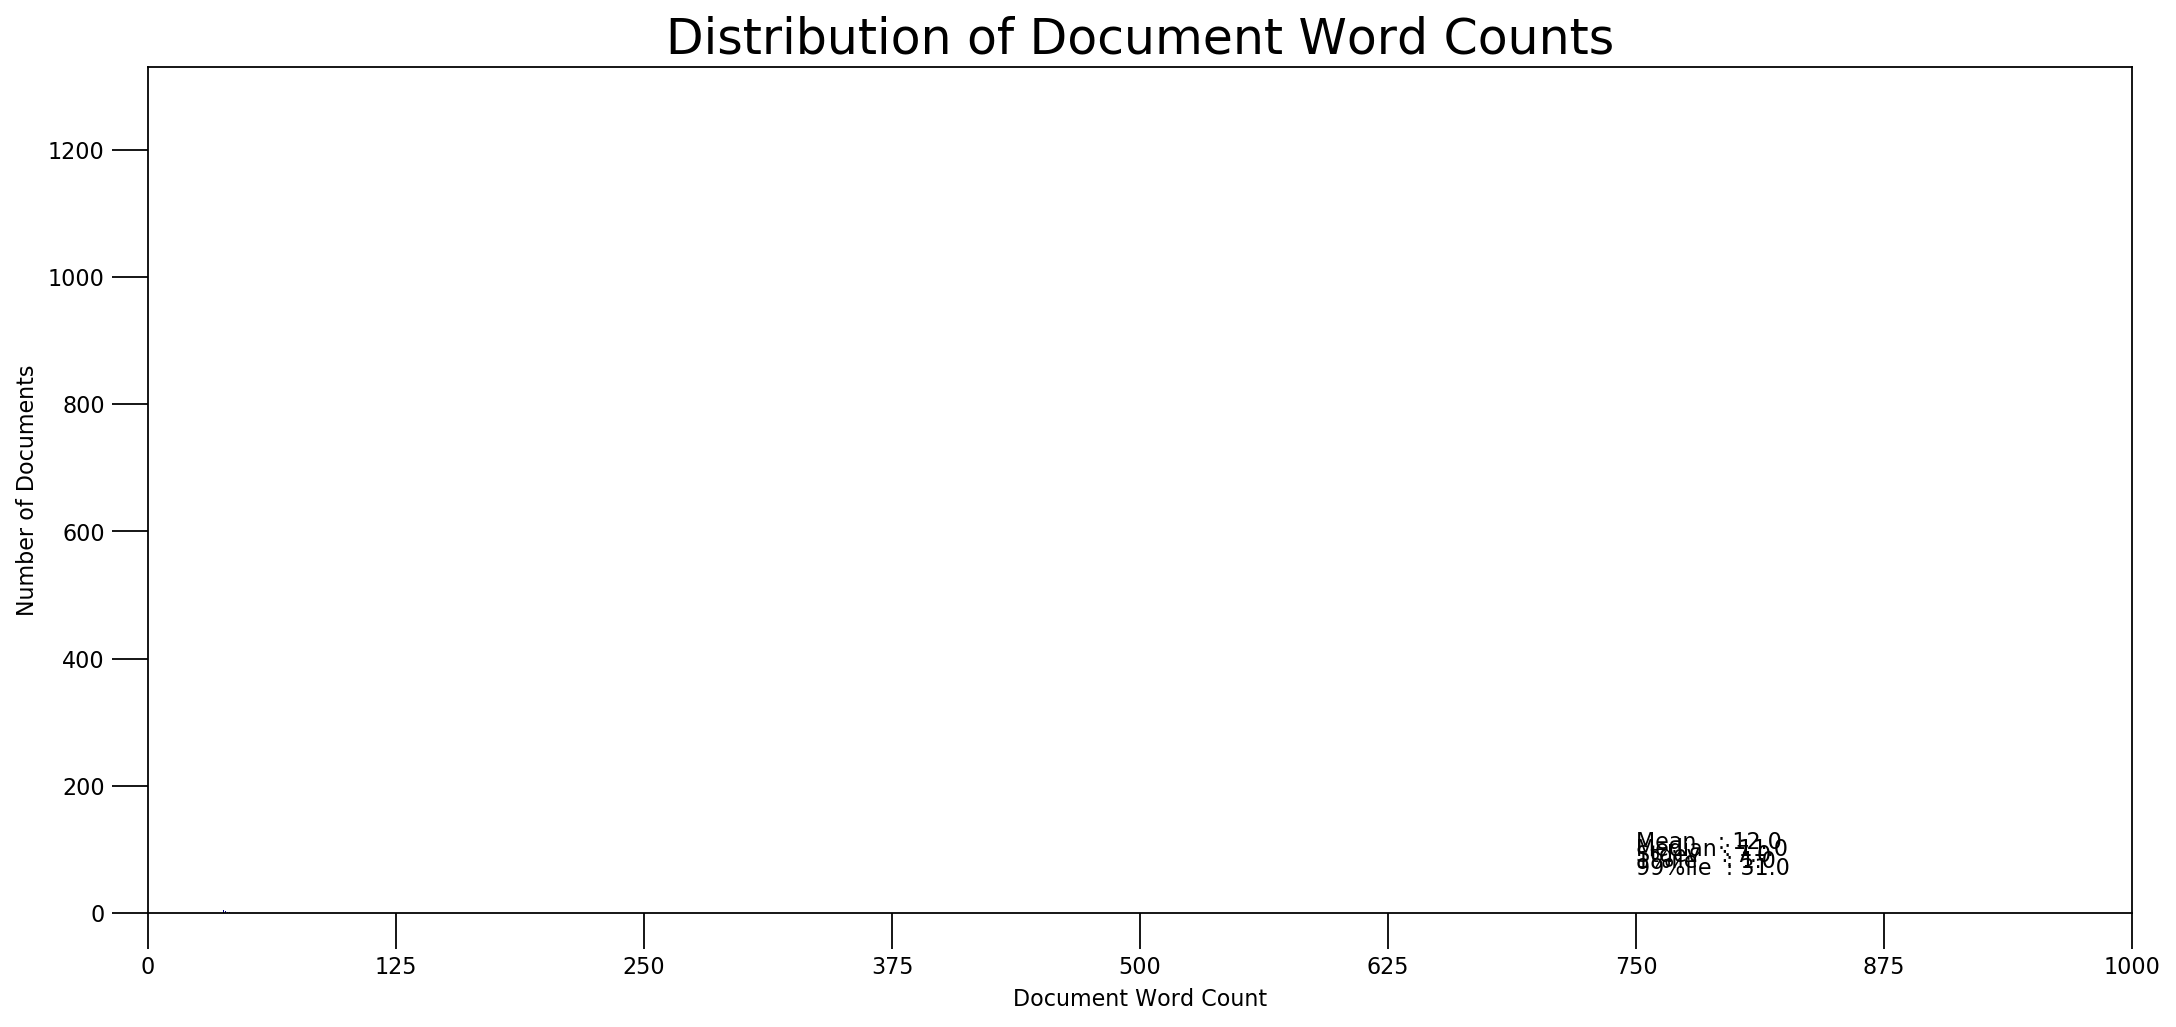

In [14]:
#show the word distributions
#this will look better when we clean up the stopwords and adjust the sample size

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(600, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\patti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


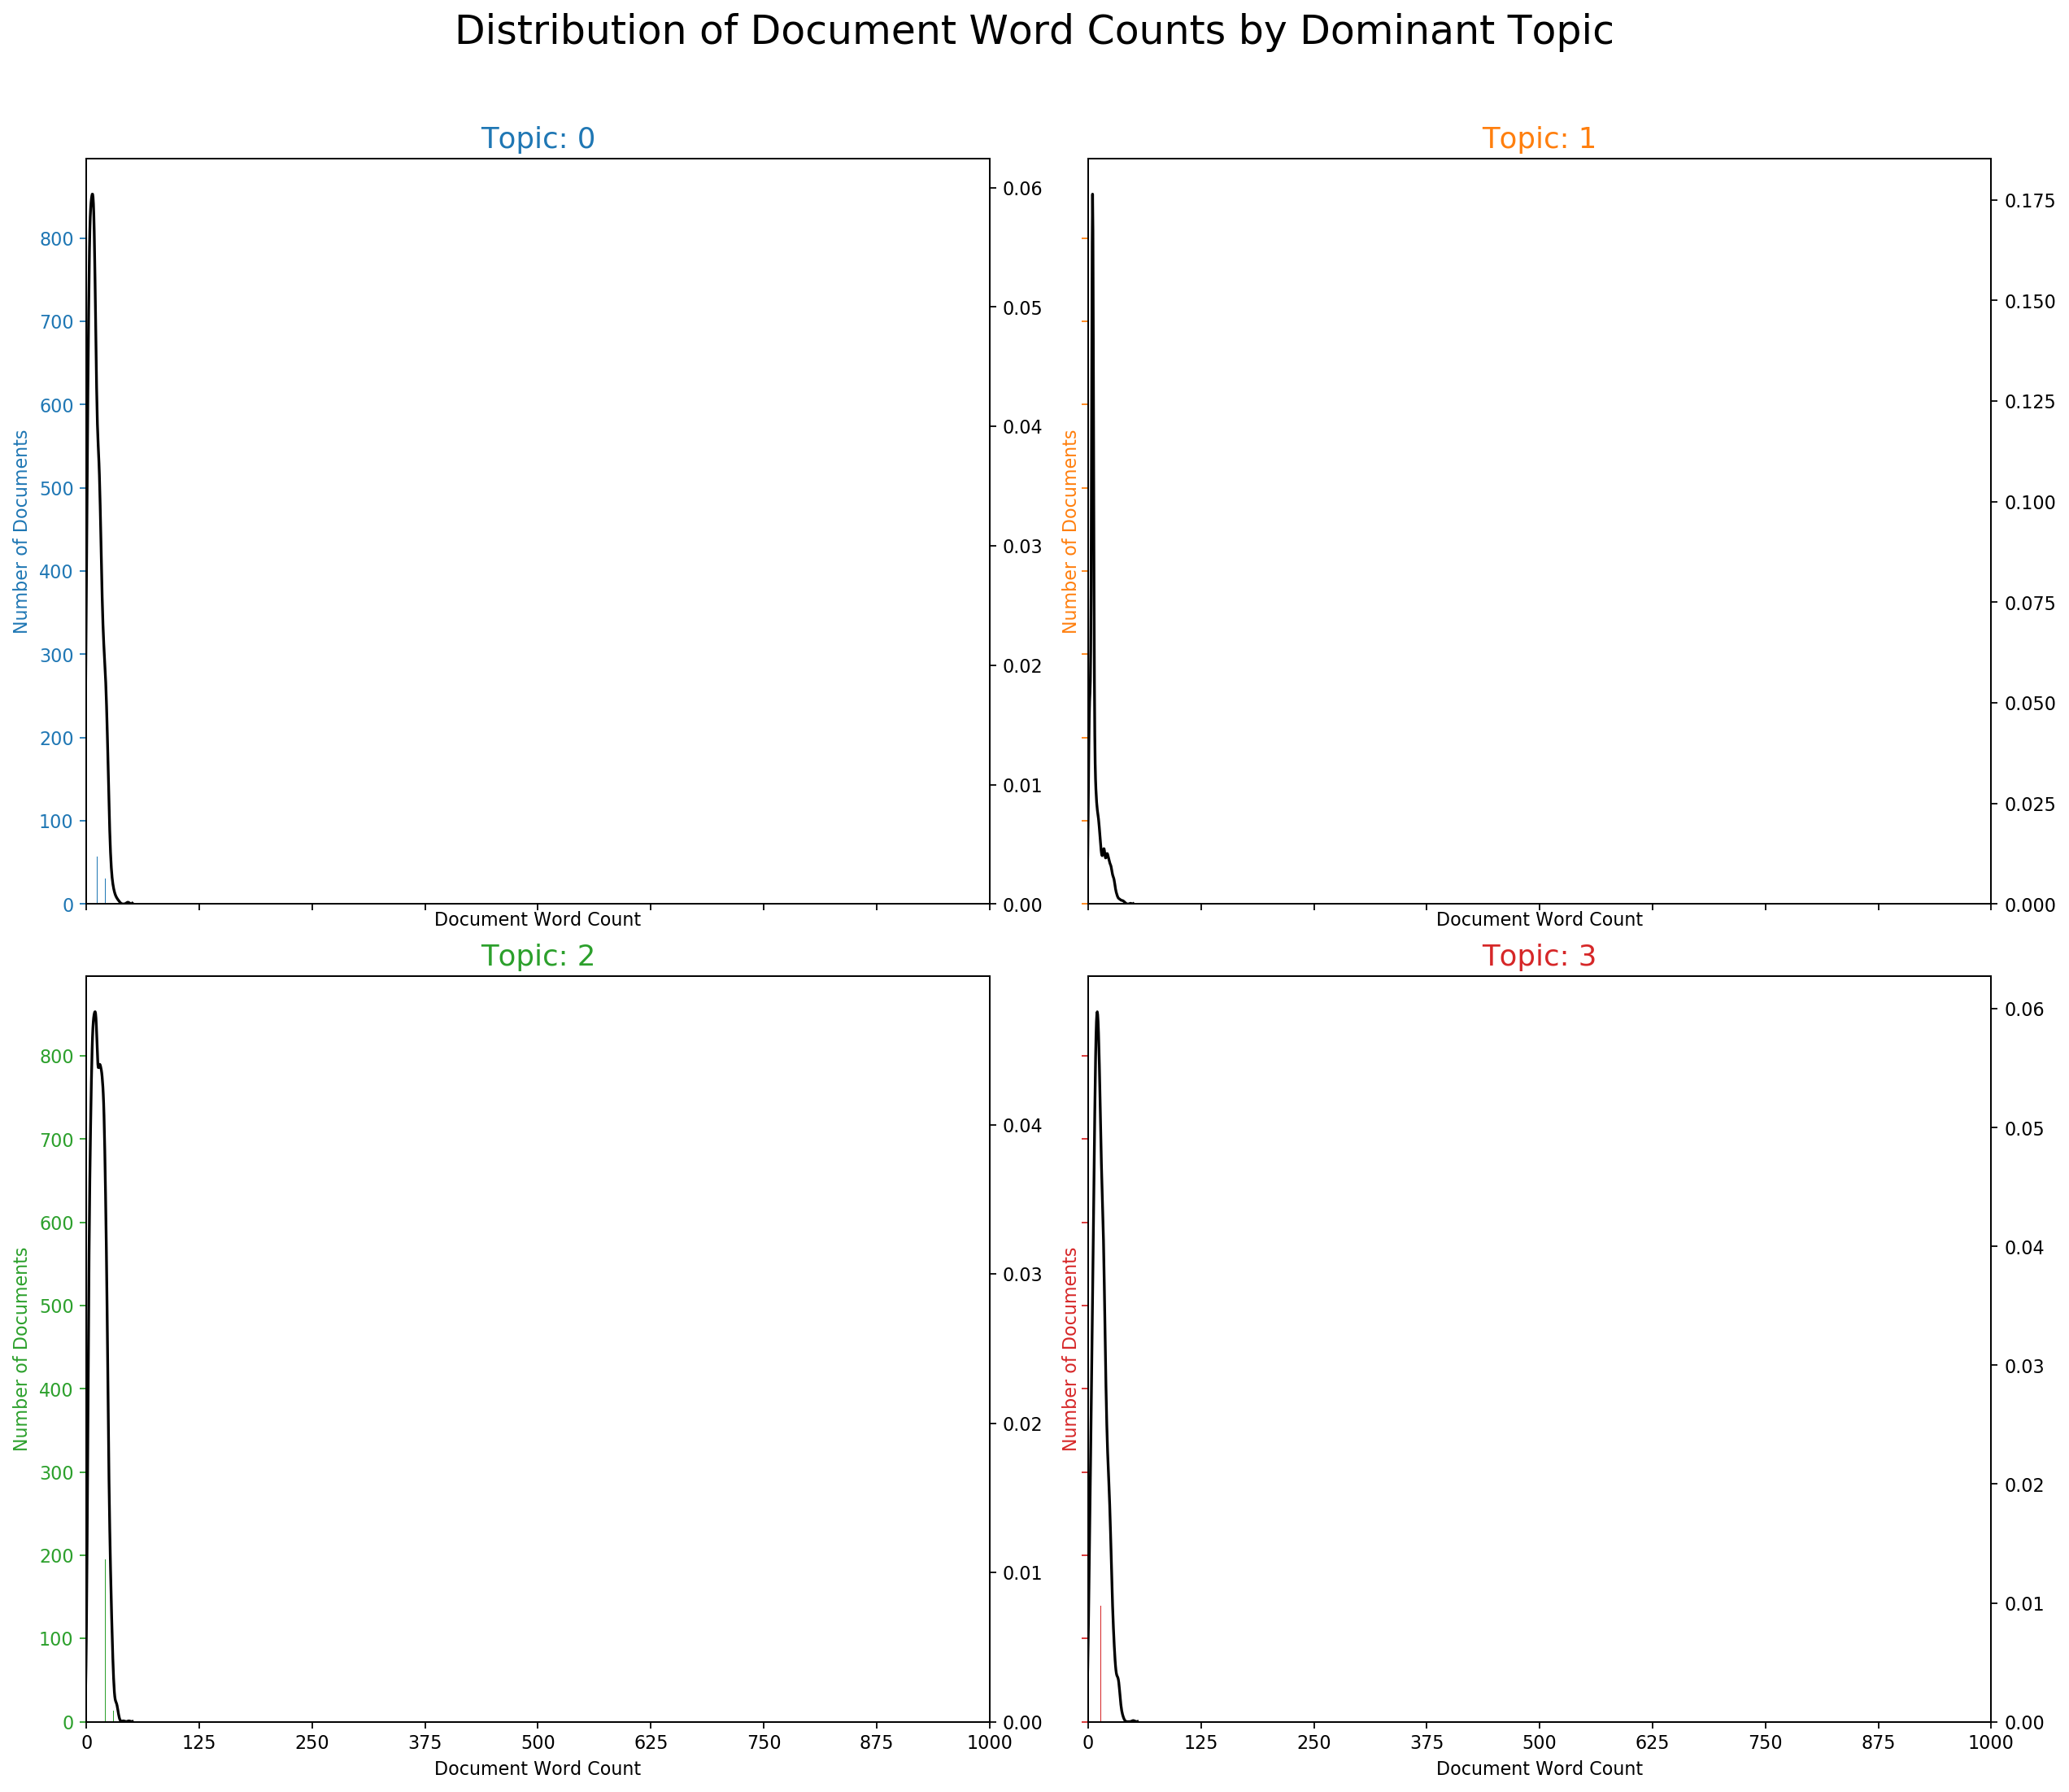

In [15]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

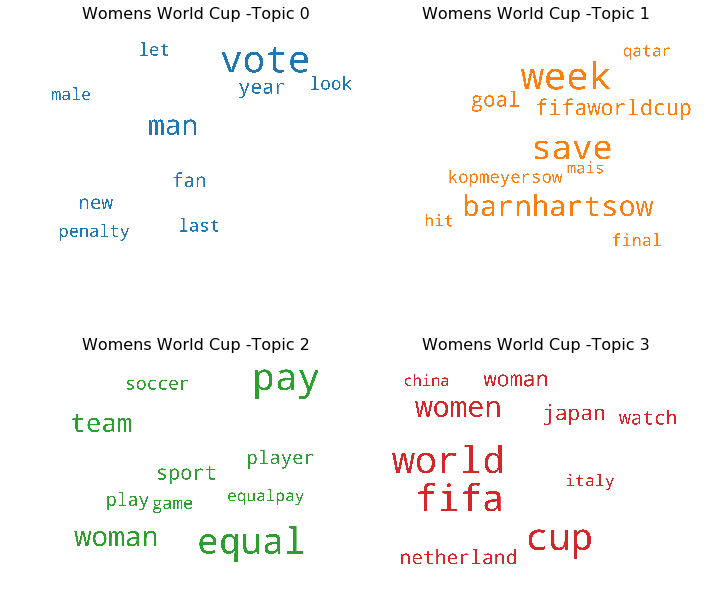

<Figure size 432x288 with 0 Axes>

In [16]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Womens World Cup -Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig('ladiescloud_square.png')

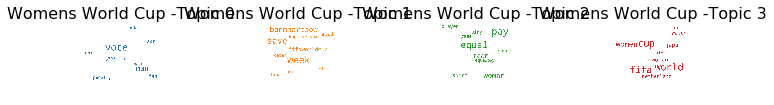

<Figure size 432x288 with 0 Axes>

In [17]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Womens World Cup -Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig('ladiescloud_horizontal.png')

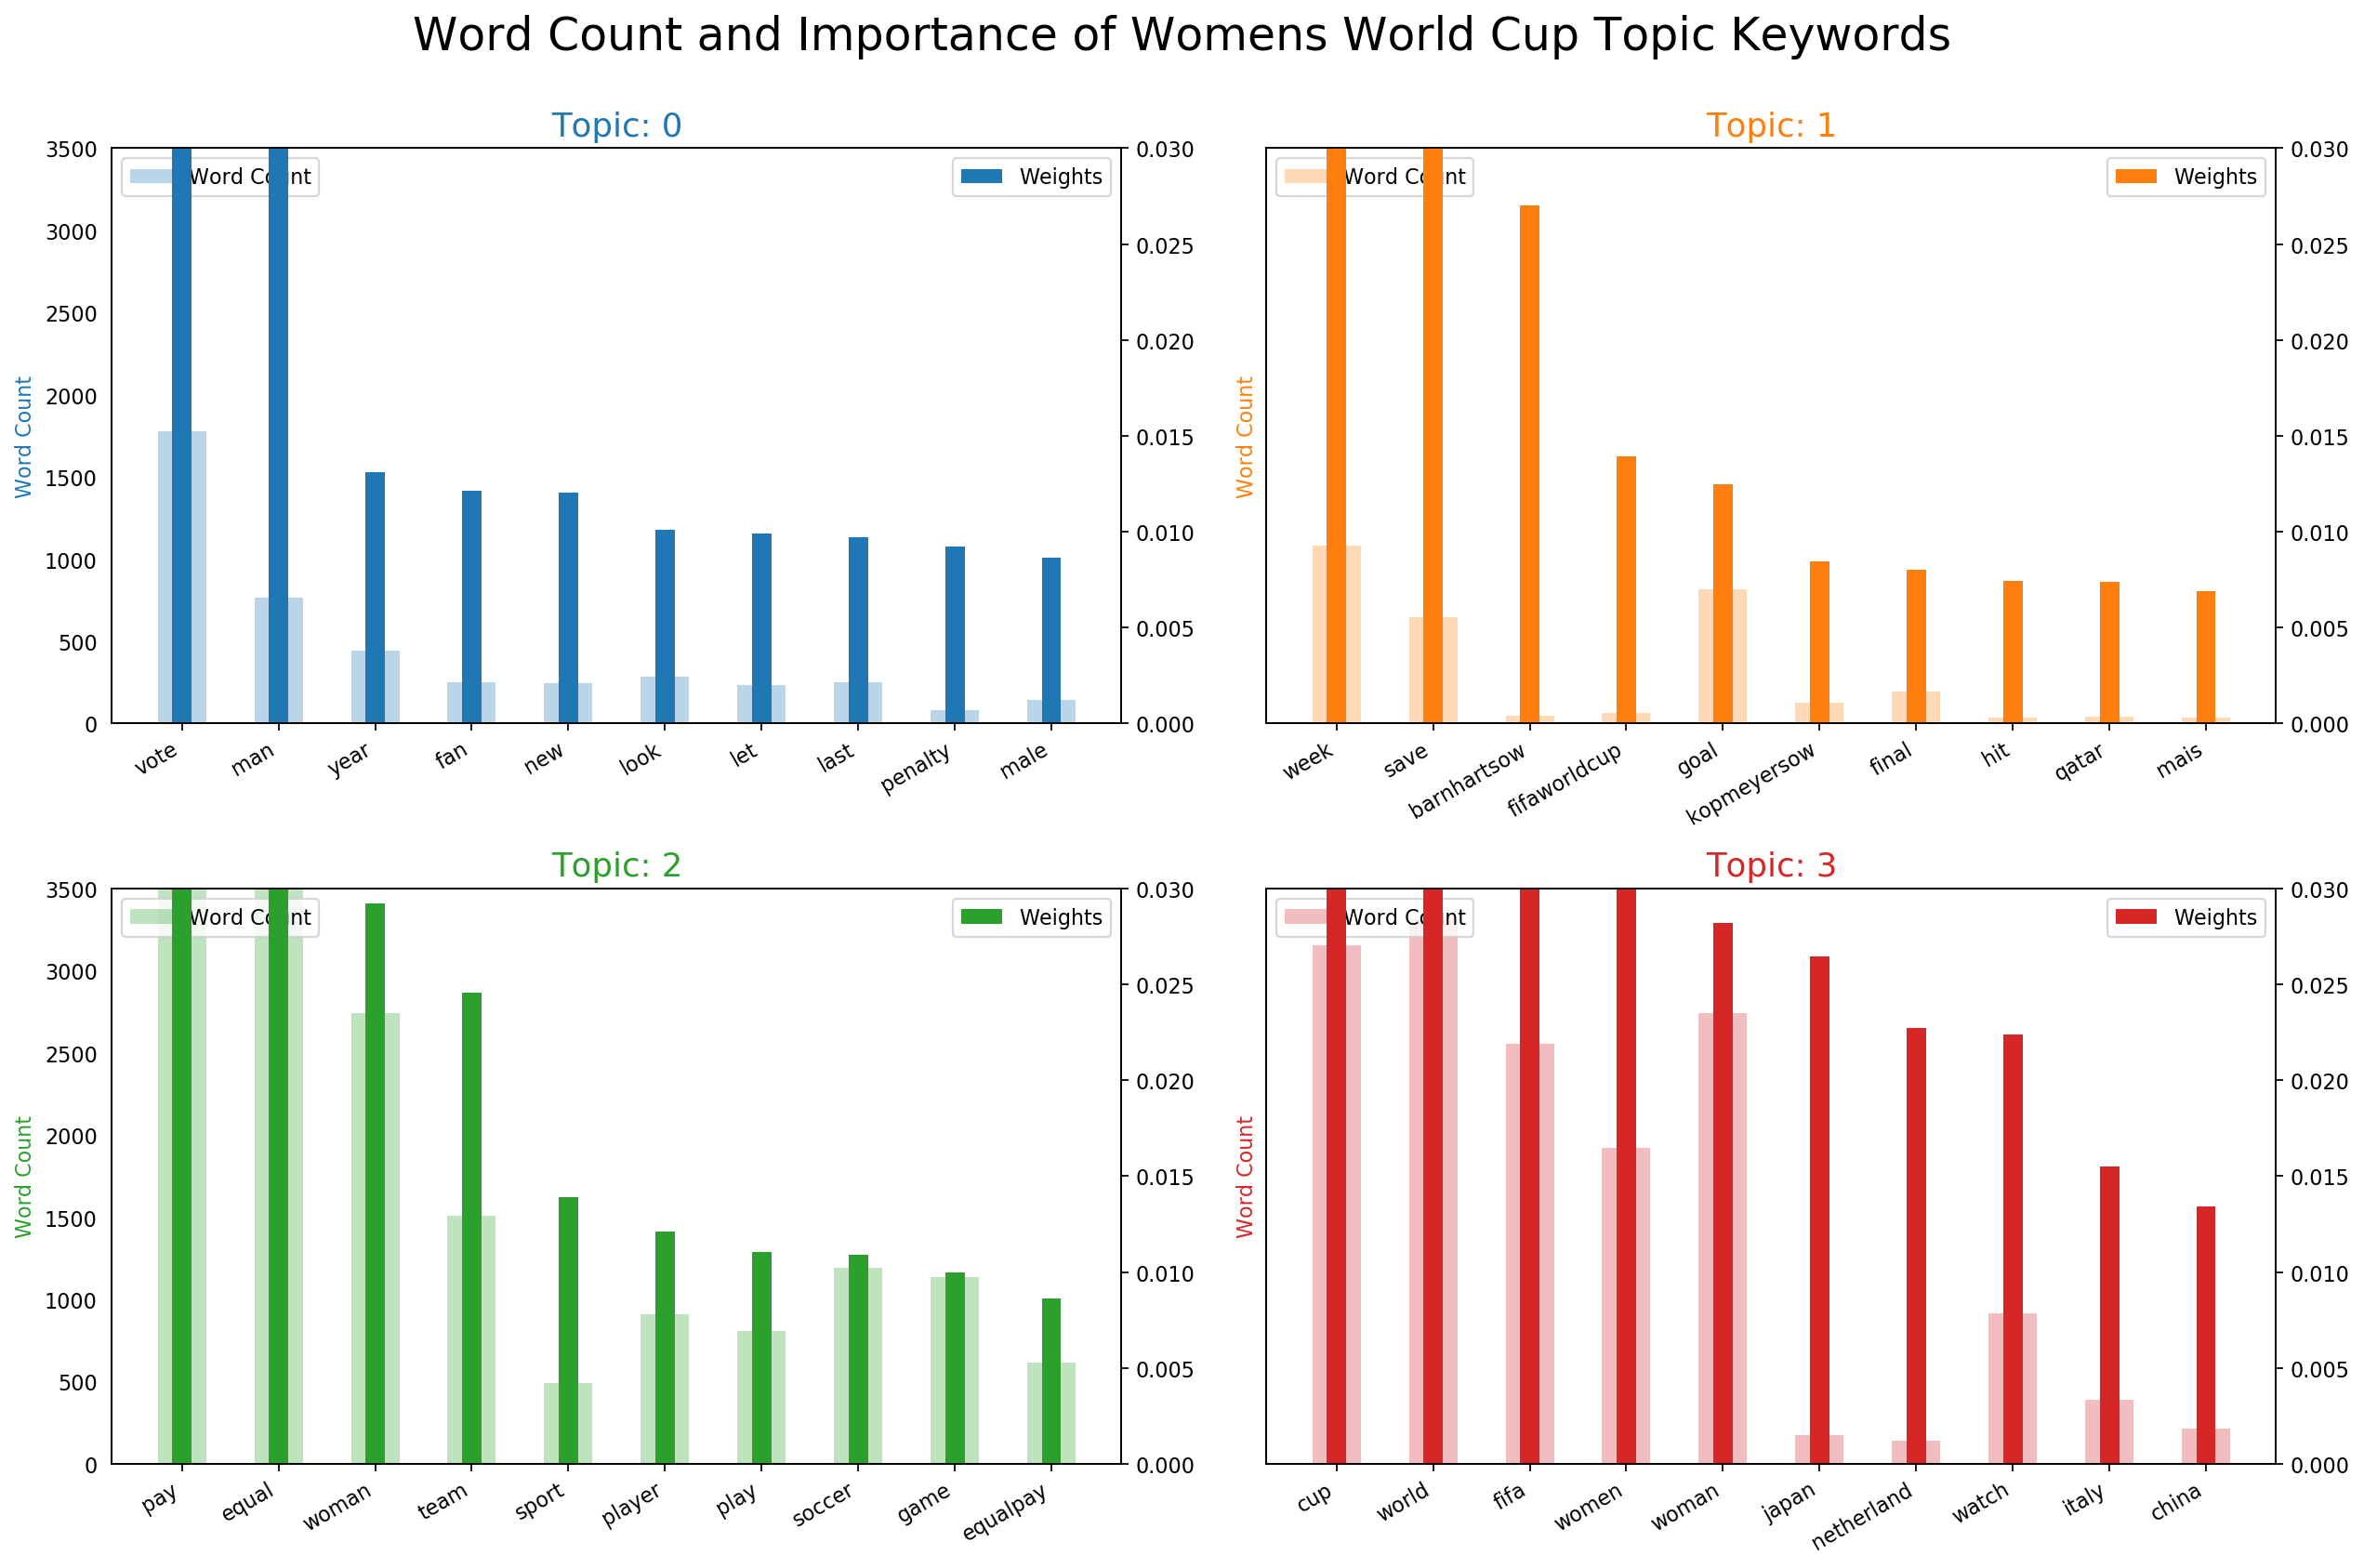

<Figure size 432x288 with 0 Axes>

In [18]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Womens World Cup Topic Keywords', fontsize=22, y=1.05)    
plt.show()
plt.savefig('ladies_wordcount_bars.png')

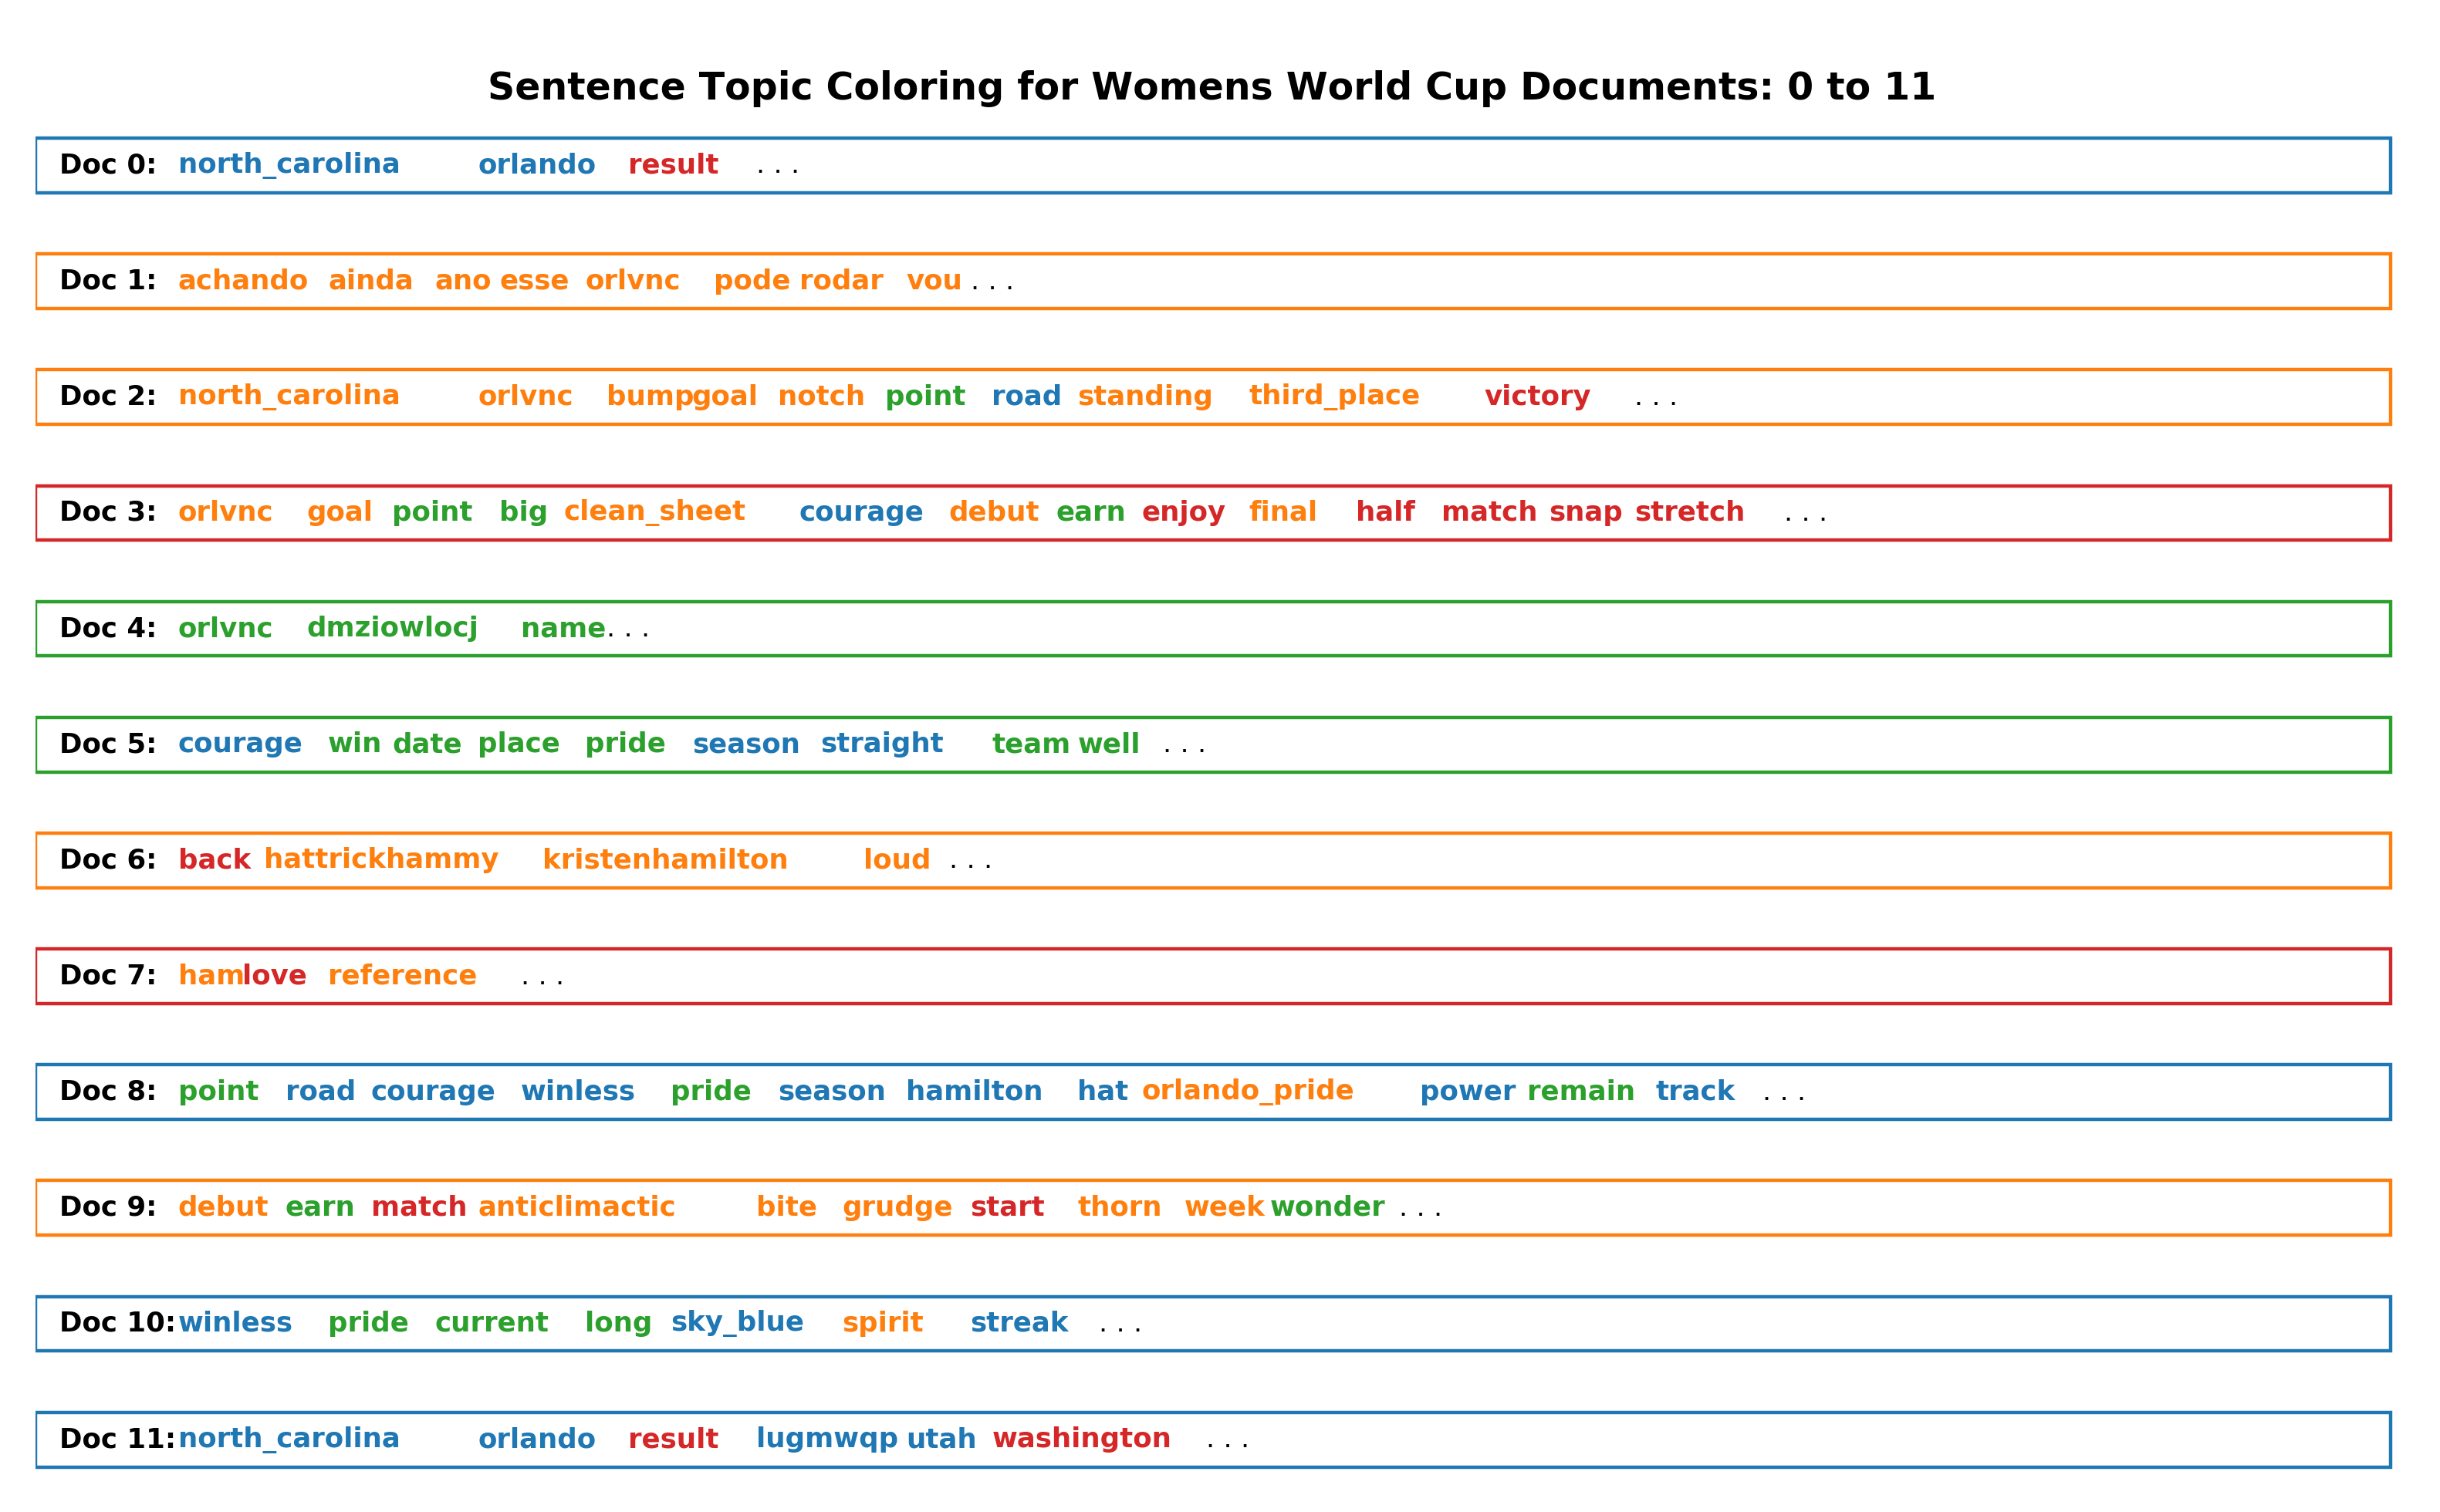

In [19]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Womens World Cup Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [20]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

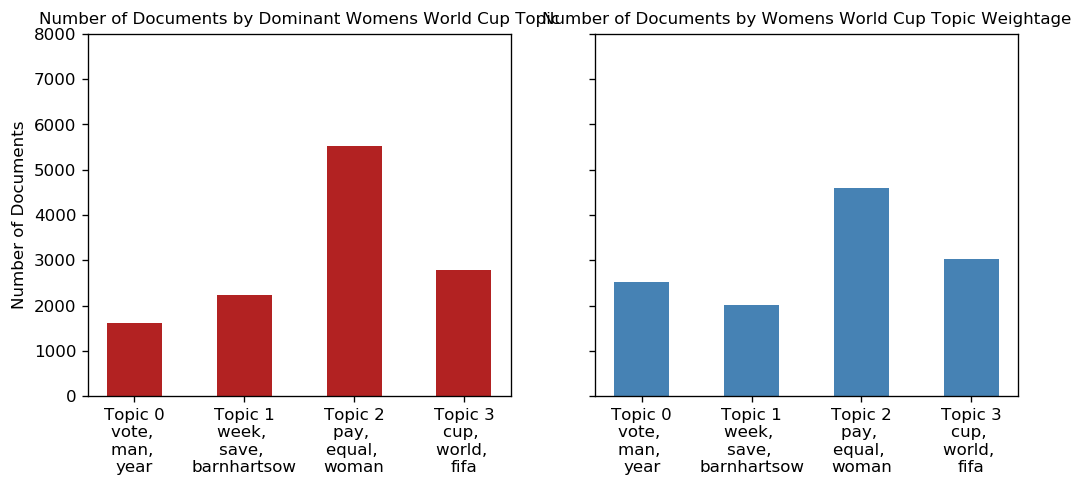

<Figure size 432x288 with 0 Axes>

In [21]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Womens World Cup Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 8000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Womens World Cup Topic Weightage', fontdict=dict(size=10))

plt.show()
plt.savefig('ladies_topic_distributions.png')

In [22]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} Womens World Cup  LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(plot, CDN, "ladies_tsne.html")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11884 samples in 0.005s...
[t-SNE] Computed neighbors for 11884 samples in 0.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11884
[t-SNE] Computed conditional probabilities for sample 2000 / 11884
[t-SNE] Computed conditional probabilities for sample 3000 / 11884
[t-SNE] Computed conditional probabilities for sample 4000 / 11884
[t-SNE] Computed conditional probabilities for sample 5000 / 11884
[t-SNE] Computed conditional probabilities for sample 6000 / 11884
[t-SNE] Computed conditional probabilities for sample 7000 / 11884
[t-SNE] Computed conditional probabilities for sample 8000 / 11884
[t-SNE] Computed conditional probabilities for sample 9000 / 11884
[t-SNE] Computed conditional probabilities for sample 10000 / 11884
[t-SNE] Computed conditional probabilities for sample 11000 / 11884
[t-SNE] Computed conditional probabilities for sample 11884 / 11884
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

Loading BokehJS ...

In [23]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\patti\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.030126 -0.302386       1        1  40.756107
3     -0.318159  0.126543       2        1  26.701540
0      0.168868  0.037751       3        1  19.015511
1      0.179418  0.138092       4        1  13.526840, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
648    Default  4048.000000           cup  4048.000000  30.0000  30.0000
655    Default  4011.000000         world  4011.000000  29.0000  29.0000
154    Default  3904.000000          fifa  3904.000000  28.0000  28.0000
1918   Default  3404.000000           pay  3404.000000  27.0000  27.0000
311    Default  1747.000000          vote  1747.000000  26.0000  26.0000
3352   Default  3135.000000         equal  3135.000000  25.0000  25.0000
168    Default  2512.000000         women  2512.000000  24.0000  24.0000
59     Default   946.000000          week   946.000000  23.0000  23.0000
310    Default   757.000000          save   757.000000  22.0000  22.0000
1386   Default   843.000000           man   843.000000  21.0000  21.0000
2772   Default  1031.000000         japan  1031.000000  20.0000  20.0000
39     Default  1461.000000          team  1461.000000  19.0000  19.0000
3784   Default   887.000000    netherland   887.000000  18.0000  18.0000
514    Default  2837.000000         woman  2837.000000  17.0000  17.0000
75     Default   873.000000         watch   873.000000  16.0000  16.0000
6114   Default   561.000000   barnhartsow   561.000000  15.0000  15.0000
3697   Default   604.000000         italy   604.000000  14.0000  14.0000
71     Default   827.000000         sport   827.000000  13.0000  13.0000
3412   Default   526.000000         china   526.000000  12.0000  12.0000
172    Default   720.000000        player   720.000000  11.0000  11.0000
198    Default   364.000000          year   364.000000  10.0000  10.0000
160    Default   657.000000          play   657.000000   9.0000   9.0000
765    Default   436.000000        france   436.000000   8.0000   8.0000
905    Default   436.000000          live   436.000000   7.0000   7.0000
338    Default   337.000000           fan   337.000000   6.0000   6.0000
984    Default   334.000000           new   334.000000   5.0000   5.0000
7131   Default   278.000000  fifaworldcup   278.000000   4.0000   4.0000
1579   Default   410.000000         round   410.000000   3.0000   3.0000
12     Default   246.000000          goal   246.000000   2.0000   2.0000
72     Default   361.000000          time   361.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
843     Topic4    98.782753         white   100.047585   1.9878  -5.2980
1420    Topic4    52.837509          liga    53.542271   1.9872  -5.9237
7131    Topic4   274.890320  fifaworldcup   278.586792   1.9871  -4.2745
833     Topic4    66.970512        lineup    67.876526   1.9871  -5.6866
2122    Topic4    50.986320          jogo    51.688511   1.9868  -5.9593
1706    Topic4    49.171642          copa    49.874947   1.9863  -5.9956
436     Topic4    46.080318           sin    46.787132   1.9853  -6.0605
5260    Topic4    48.039181           une    48.780300   1.9852  -6.0189
4864    Topic4    43.250107           uma    43.952057   1.9844  -6.1239
2228    Topic4    42.179806           sim    42.903519   1.9835  -6.1490
316     Topic4    49.788033       stat_us    50.659801   1.9831  -5.9831
634     Topic4    40.094677    acompanhar    40.799641   1.9831  -6.1996
121     Topic4    40.205128            ai    40.923378   1.9828  -6.1969
3925    Topic4    39.548874         marta    40.262470   1.9826  -6.2134
1708    Topic4    38.832958           nao    39.535614   1.9826  -6.2316
3237    Topic4    37.151001          pelo    37.855083   1.9817  -6.2759
1831    Topic4    39.631699           dan    40.434486  

In [24]:
p = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.save_html(p, 'ladies_lda.html')